# Bar Chart Race in Python with Matplotlib

~In roughly less than 50 lines of code.

![gif](https://pratapvardhan.com/img/b/bar-chart-race-2.gif)

How easy would it be to re-create bar chart race in Python using Jupyter and Matplotlib?

Turns out, in less than 50 lines of code, you can reasonably re-create reusable bar chart race in Python with Matplotlib.

### import the dependent libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

### Data

Read the [city populations dataset](https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations) with `pandas`.

We only need 4 columns to work with `'name', 'group', 'year', 'value'`.
Typically, a `name` is mapped to a `group` and each `year` has one `value`.

In [3]:
url = 'time_series-ncov-Confirmed.csv'
df = pd.read_csv(url)
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Value
0,NaN,Afghanistan,33.0,65.0,3/20/2020,24
1,NaN,Afghanistan,33.0,65.0,3/19/2020,22
2,NaN,Afghanistan,33.0,65.0,3/18/2020,22
3,NaN,Afghanistan,33.0,65.0,3/17/2020,22
4,NaN,Afghanistan,33.0,65.0,3/16/2020,21
5,NaN,Afghanistan,33.0,65.0,3/15/2020,16
6,NaN,Afghanistan,33.0,65.0,3/14/2020,11
7,NaN,Afghanistan,33.0,65.0,3/13/2020,7
8,NaN,Afghanistan,33.0,65.0,3/12/2020,7
9,NaN,Afghanistan,33.0,65.0,3/11/2020,7


In [4]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Value               int64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Value                      int64
dtype: object

In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Value
0,NaN,Afghanistan,33.0,65.0,2020-03-20,24
1,NaN,Afghanistan,33.0,65.0,2020-03-19,22
2,NaN,Afghanistan,33.0,65.0,2020-03-18,22
3,NaN,Afghanistan,33.0,65.0,2020-03-17,22
4,NaN,Afghanistan,33.0,65.0,2020-03-16,21


In [84]:
# Choose the TOP 13 countries for further barchart presentation
name_list = ["China", "Italy", "Spain", "Germany", "Iran", "France", "Korea, South", "US", "Switzerland", "United Kingdom", "Netherlands", "Austria"]

In [135]:
# Narrow down the dataset with given countries above
df1 = df.loc[df["Country/Region"].isin(name_list)]
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Value
1003,NaN,Austria,47.5162,14.5501,2020-03-20,2388
1004,NaN,Austria,47.5162,14.5501,2020-03-19,2013
1005,NaN,Austria,47.5162,14.5501,2020-03-18,1646
1006,NaN,Austria,47.5162,14.5501,2020-03-17,1332
1007,NaN,Austria,47.5162,14.5501,2020-03-16,1018


In [136]:
# Get rid of latitude and longitude
df2 = df1[["Province/State", "Country/Region", "Date", "Value"]]
# Since some countries have detailed numbers under "Province/State" column while other dont
# Aggregate the "Value" of each province/state 
df2 = df2.groupby(["Country/Region", "Date"]).sum()
df2.head(3)

Value
Country/Region Date             
Austria        2020-01-22      0
               2020-01-23      0
               2020-01-24      0

In [137]:
df3 = df2.reset_index(level = "Date")
df3.head()

,Date,Value
Country/Region,,
Austria,2020-01-22,0
Austria,2020-01-23,0
Austria,2020-01-24,0
Austria,2020-01-25,0
Austria,2020-01-26,0


In [138]:
df4 = df3.reset_index(level = "Country/Region")
df4.head()

,Country/Region,Date,Value
0,Austria,2020-01-22,0
1,Austria,2020-01-23,0
2,Austria,2020-01-24,0
3,Austria,2020-01-25,0
4,Austria,2020-01-26,0


In [160]:
df4.dtypes

Country/Region            object
Date              datetime64[ns]
Value                      int64
dtype: object

### Color, Labels

We'll user `colors` and `group_lk` to add color to the bars.

In [153]:
colors = dict(zip(
    ["China", "Italy", "Spain", "Germany", "Iran", "France", "Korea, South", "US", "Switzerland", "United Kingdom", "Netherlands", "Austria"],
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50", "#F0E68C", "#90EE90", "#00FFFF","#AFEEEE","#eafb50"]
))
# group_lk = df.set_index('Province/State')['Country/Region'].to_dict()

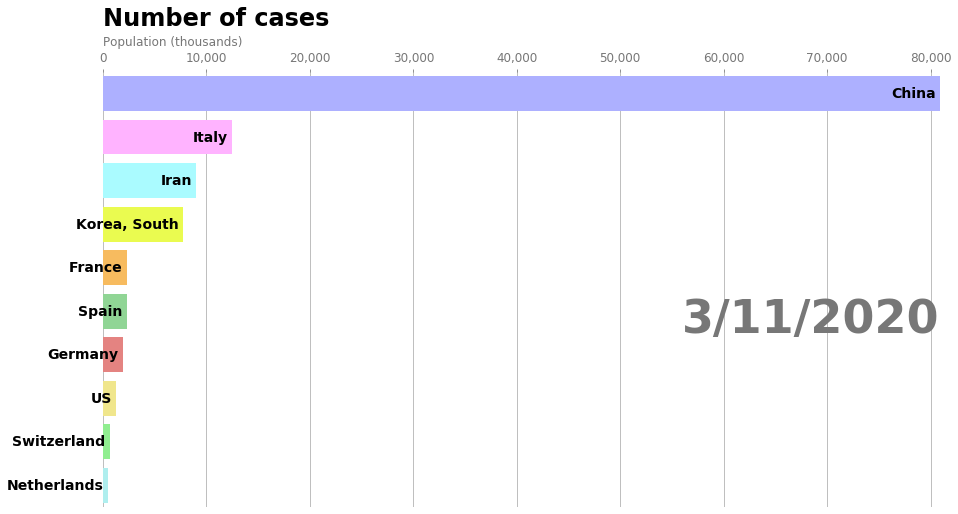

In [163]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_date):
    dff = df4[df4['Date'].eq(current_date)].sort_values(by='Value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country/Region'], dff['Value'], color=[colors[x] for x in dff['Country/Region']])  
    dx = dff['Value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Value'], dff['Country/Region'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='center')
#         ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
#         ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Number of cases',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)
    
draw_barchart("3/11/2020")

In [190]:
# date_list = pd.date_range("1/22/2020", "3/20/2020").tolist()
# date_list

In [191]:
df5 = df4.copy()
df5["Date"] = df5["Date"].astype(str)
date_list = df5["Date"].unique()

## Animate

To animate, we will use [`FuncAnimation`][FuncAnimation] from `matplotlib.animation`.

[`FuncAnimation`][FuncAnimation] makes an animation by repeatedly calling a function (that draws on canvas). 
In our case, it'll be `draw_barchart`.

`frames` arguments accepts on what values you want to run `draw_barchart` -- we'll
run from `year` 1900 to 2018.

Run below cell.

[FuncAnimation]: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html

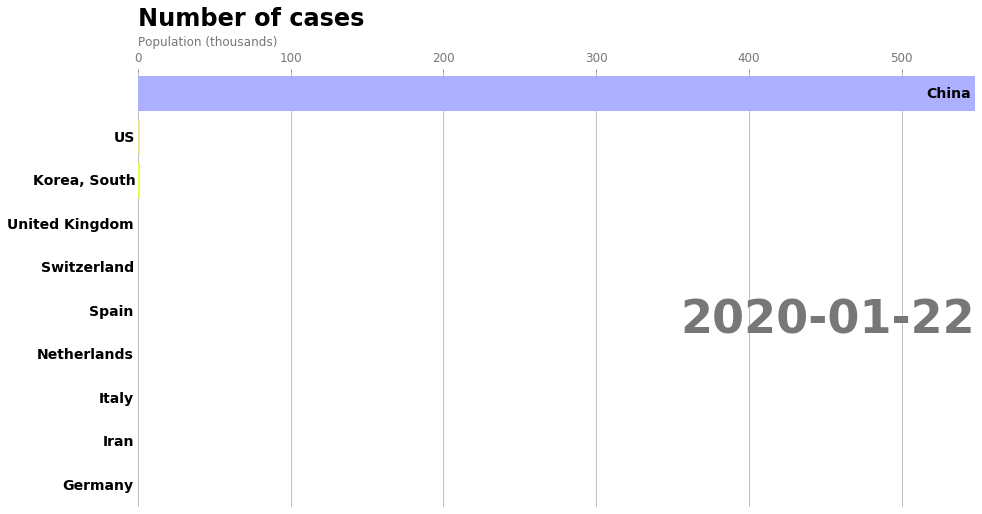

In [189]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=date_list)
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save() 

### xkcd-style

Turning your matplotlib plots into xkcd styled ones is pretty easy.
You can simply turn on `xkcd` sketch-style drawing mode with `plt.xkcd`.

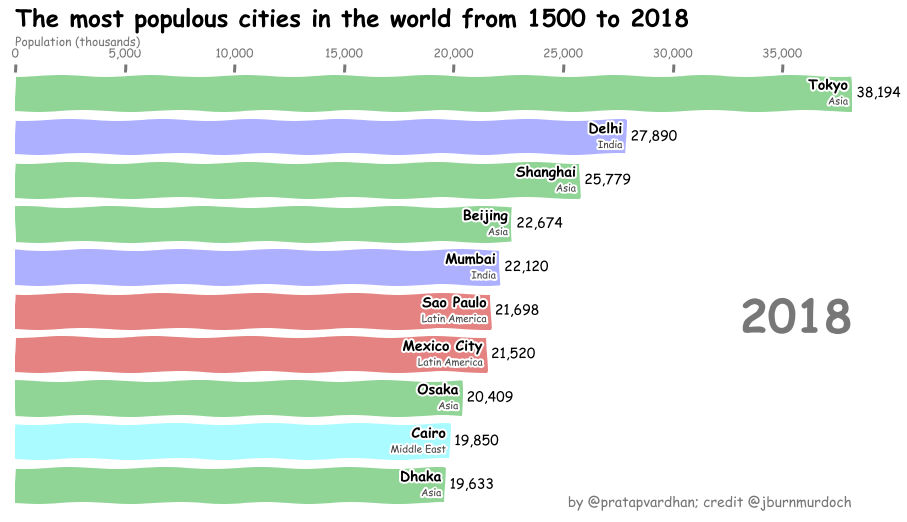

In [5]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15, 8))
    draw_barchart(2018)

# Step by step: Details

We'll now go over the ouput from sratch.

### Data transformations

We are interested to see top `value`s are a given `year`.
Using pandas transformations, we will get top `10` values.

In [6]:
current_year = 2018
dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=False).head(10)
dff

,name,group,year,value
6045,Tokyo,Asia,2018,38194.2
1324,Delhi,India,2018,27890.0
5547,Shanghai,Asia,2018,25778.6
689,Beijing,Asia,2018,22674.2
3748,Mumbai,India,2018,22120.0
5445,Sao Paulo,Latin America,2018,21697.8
3574,Mexico City,Latin America,2018,21520.4
4679,Osaka,Asia,2018,20409.0
1195,Cairo,Middle East,2018,19849.6
1336,Dhaka,Asia,2018,19632.6


### Basic chart

Now, let's plot a basic bar chart. We start by creating a figure and an axes.
Then, we use `ax.barh(x, y)` to draw horizontal barchart.


<BarContainer object of 10 artists>

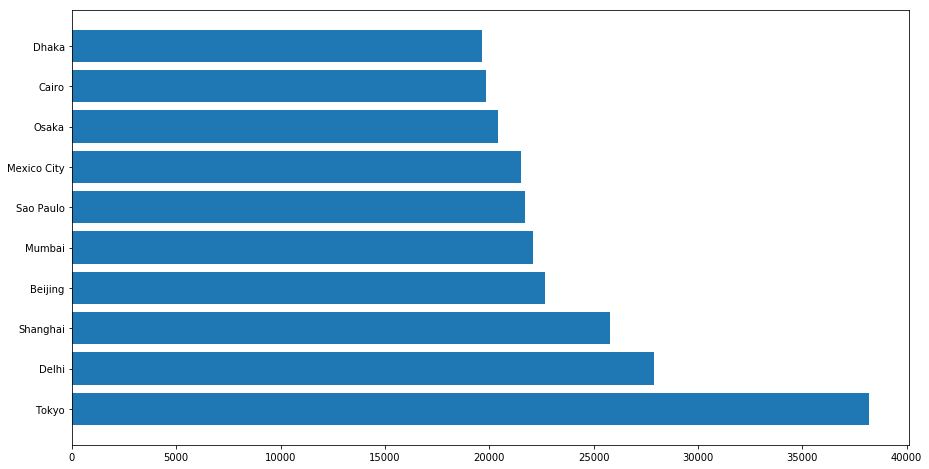

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

### Color, Labels

Next, let's add group labels and colors based on groups.
We'll user `colors` and `group_lk` to add color to the bars.

Text(1, 0.4, '2018')

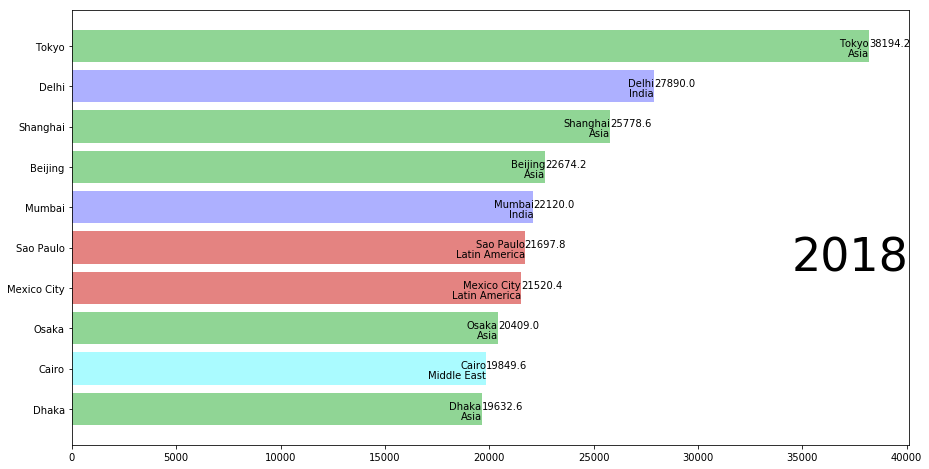

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')
    ax.text(value, i-.25, group_lk[name],  ha='right')
    ax.text(value, i,     value, ha='left')
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

### Polish Style

For convenience let's move our code to `draw_barchart` function.

We need to style following items:

- Text: font sizes, color, orientation 
- Format: comma separated values and axes tickers
- Axis: Move to top, color, add subtitle
- Grid: Add lines behind bars
- Remove box frame
- Add title, credit

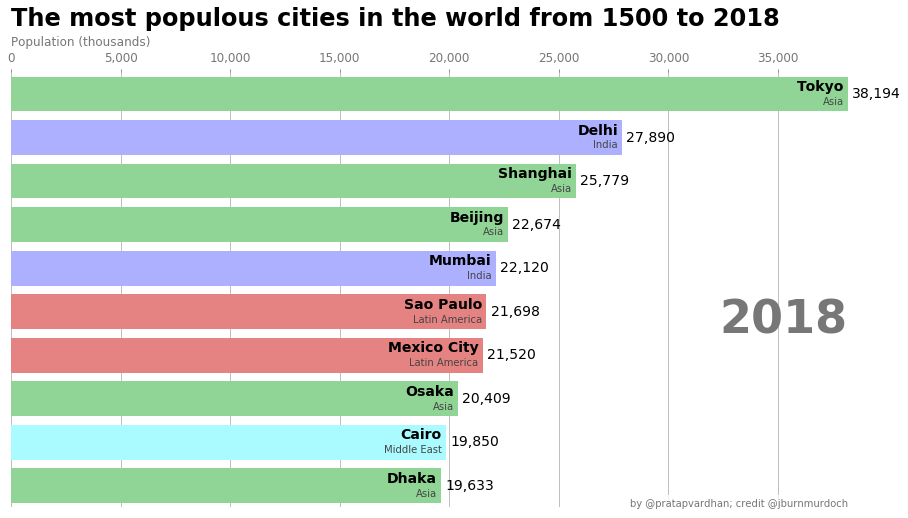

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(2018)

Matplotlib is a massive library, being able to adjust every aspect of a plot is powerful
but it can be complex / time-consuming for highly customized charts.
Atleast, for these bar chart races, it was fairly quick!